In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots  # Corrected import statement


In [2]:
# read in dataframe
df = pd.read_csv('player_career_per_game_stats_positions_aug_24.csv')

In [3]:
# create some calculated metrics

df['total minutes'] = df['minutesPlayed']*df['gamesPlayed']

df['offense percentage'] = df['oPointsPlayed']/ (df['pointsPlayed'])

df['goal assist ratio'] = df['goals'] / df['scores']

df['completions per minute'] = df['completions'] / df['minutesPlayed']

df = df[df['total minutes'] >= 100]

In [4]:
# get dataset for modeling
data = df.dropna(subset = 'position')
data.dropna(subset = 'goal assist ratio', inplace = True)
data.dropna(subset = 'completionPercentage', inplace = True)

C:\Users\jacob\AppData\Local\Temp\ipykernel_39228\1954113605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset = 'goal assist ratio', inplace = True)
C:\Users\jacob\AppData\Local\Temp\ipykernel_39228\1954113605.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset = 'completionPercentage', inplace = True)


In [5]:
scaler = StandardScaler()

# Split the data into features and target
X = data.drop(['Unnamed: 0', 'playerID', 'name', 'position', 'yardsTotal', 'yardsThrown', 'completionPercentage',
              'yardsReceived', 'hucksCompleted', 'huckPercentage', 'oEfficiency', 'height', 'weight'], axis=1)
X = scaler.fit_transform(X)

y = data['position']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=987)

# pipeline = make_pipeline(StandardScaler(), rf_classifier)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1_weighted')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions using the best model
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Classification Report:
               precision    recall  f1-score   support

      Cutter       0.66      0.70      0.68        30
    Defender       0.53      0.45      0.49        22
     Handler       0.58      0.88      0.70        24
      Hybrid       0.40      0.19      0.26        21

    accuracy                           0.58        97
   macro avg       0.54      0.56      0.53        97
weighted avg       0.55      0.58      0.55        97

Confusion Matrix:
 [[21  5  0  4]
 [ 7 10  5  0]
 [ 0  1 21  2]
 [ 4  3 10  4]]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},


# Create a Logistic regression classifier
lr_classifier = LogisticRegression(random_state=987, max_iter=1000)
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lr_classifier, param_grid=param_grid, cv=5, scoring='f1_weighted')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions using the best model
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Best Hyperparameters: {'C': 0.01}
Classification Report:
               precision    recall  f1-score   support

      Cutter       0.65      0.80      0.72        30
    Defender       0.70      0.64      0.67        22
     Handler       0.61      0.92      0.73        24
      Hybrid       0.50      0.10      0.16        21

    accuracy                           0.64        97
   macro avg       0.61      0.61      0.57        97
weighted avg       0.62      0.64      0.59        97

Confusion Matrix:
 [[24  4  0  2]
 [ 5 14  3  0]
 [ 1  1 22  0]
 [ 7  1 11  2]]


In [7]:
df['position'] = np.where(df['position'].str.contains('Hybrid'), np.nan, df['position'])

# get dataset for modeling
data = df.dropna(subset = 'position')
data.dropna(subset = 'goal assist ratio', inplace = True)
data.dropna(subset = 'completionPercentage', inplace = True)

C:\Users\jacob\AppData\Local\Temp\ipykernel_39228\320254356.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset = 'goal assist ratio', inplace = True)
C:\Users\jacob\AppData\Local\Temp\ipykernel_39228\320254356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset = 'completionPercentage', inplace = True)


In [8]:
scaler = StandardScaler()

# Split the data into features and target
X = data.drop(['Unnamed: 0','playerID', 'name', 'position', 'yardsTotal', 'yardsThrown', 'completionPercentage',
              'yardsReceived', 'hucksCompleted', 'huckPercentage', 'oEfficiency', 'height', 'weight'], axis=1)
X = scaler.fit_transform(X)

y = data['position']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=987)

# pipeline = make_pipeline(StandardScaler(), rf_classifier)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1_weighted')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions using the best model
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Classification Report:
               precision    recall  f1-score   support

      Cutter       0.92      0.79      0.85        29
    Defender       0.82      0.74      0.78        19
     Handler       0.78      0.94      0.85        31

    accuracy                           0.84        79
   macro avg       0.84      0.82      0.83        79
weighted avg       0.84      0.84      0.83        79

Confusion Matrix:
 [[23  2  4]
 [ 1 14  4]
 [ 1  1 29]]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},


# Create a Logistic regression classifier
lr_classifier = LogisticRegression(random_state=987, max_iter=1000)
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lr_classifier, param_grid=param_grid, cv=5, scoring='f1_weighted')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions using the best model
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Best Hyperparameters: {'C': 0.1}
Classification Report:
               precision    recall  f1-score   support

      Cutter       0.88      0.79      0.84        29
    Defender       0.72      0.68      0.70        19
     Handler       0.80      0.90      0.85        31

    accuracy                           0.81        79
   macro avg       0.80      0.79      0.80        79
weighted avg       0.81      0.81      0.81        79

Confusion Matrix:
 [[23  3  3]
 [ 2 13  4]
 [ 1  2 28]]


Final Classification Report for random forest classifier:
               precision    recall  f1-score   support

      Cutter       0.85      0.74      0.79       144
    Defender       0.71      0.69      0.70       107
     Handler       0.82      0.94      0.87       144

    accuracy                           0.80       395
   macro avg       0.79      0.79      0.79       395
weighted avg       0.80      0.80      0.80       395

Overall Accuracy: 80.00%
--------------------------------------------------


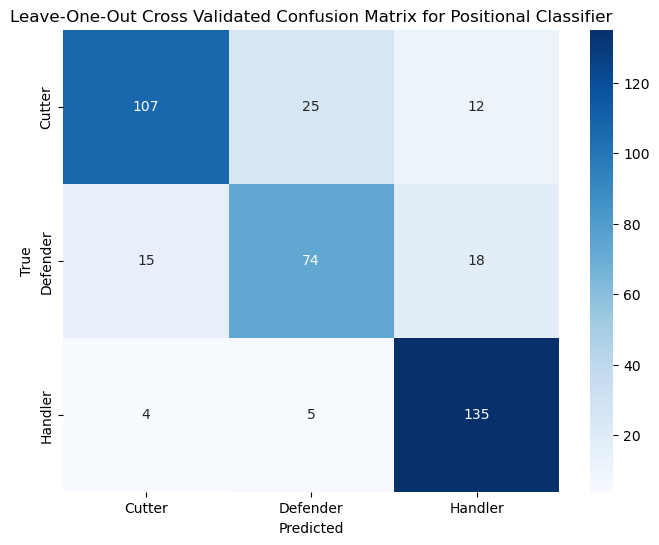

In [10]:
loo = LeaveOneOut()

# Initialize variables to store aggregated metrics
all_y_true = []
all_y_pred = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a logistic regression model
    model = RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Store true and predicted values
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)


# Aggregate metrics
final_report = classification_report(all_y_true, all_y_pred)
final_accuracy = accuracy_score(all_y_true, all_y_pred)
print(f"Final Classification Report for random forest classifier:\n", final_report)
print(f"Overall Accuracy: {final_accuracy * 100:.2f}%")
print("-" * 50)

# Create a confusion matrix heatmap
final_conf_matrix = confusion_matrix(all_y_true, all_y_pred, labels=np.unique(all_y_true))
plt.figure(figsize=(8, 6))
sns.heatmap(final_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(all_y_true),
            yticklabels=np.unique(all_y_true))
plt.title("Leave-One-Out Cross Validated Confusion Matrix for Positional Classifier")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


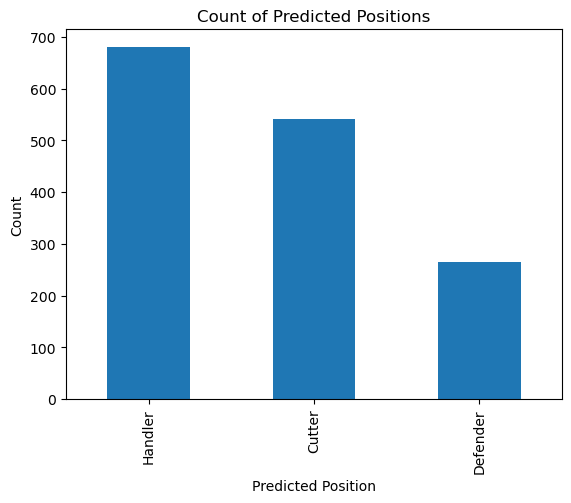

In [12]:

# Split the data into features and target
X = data.drop(['Unnamed: 0', 'playerID', 'name', 'position', 'yardsTotal', 'yardsThrown', 'completionPercentage',
              'yardsReceived', 'hucksCompleted', 'huckPercentage', 'oEfficiency', 'height', 'weight'], axis=1)
X = scaler.fit_transform(X)

y = data['position']
# Create a logistic regression model
model = RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100)

# Fit the model
model.fit(X, y)

df.dropna(subset = 'goal assist ratio', inplace = True)
df.dropna(subset = 'completionPercentage', inplace = True)
# Split the data into features and target
X = df.drop(['Unnamed: 0','playerID', 'name', 'position', 'yardsTotal', 'yardsThrown', 'completionPercentage',
              'yardsReceived', 'hucksCompleted', 'huckPercentage', 'oEfficiency', 'height', 'weight'], axis=1)

Xarr = scaler.transform(X)

all_pred = model.predict(Xarr)

df['predicted_position'] = all_pred

category_counts = df['predicted_position'].value_counts()

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the bar chart
category_counts.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('Predicted Position')
ax.set_ylabel('Count')
ax.set_title('Count of Predicted Positions')

# Show the plot
plt.show()

In [13]:
df['predicted_position'].value_counts()

Handler     680
Cutter      541
Defender    264
Name: predicted_position, dtype: int64

In [19]:
df.columns

Index(['Unnamed: 0', 'playerID', 'name', 'gamesPlayed', 'scores', 'assists',
       'goals', 'plusMinus', 'completions', 'completionPercentage',
       'hockeyAssists', 'throwaways', 'stalls', 'drops', 'blocks', 'callahans',
       'pulls', 'yardsTotal', 'yardsThrown', 'yardsReceived', 'hucksCompleted',
       'huckPercentage', 'minutesPlayed', 'possessions', 'oEfficiency',
       'pointsPlayed', 'oPointsPlayed', 'dPointsPlayed', 'height', 'weight',
       'position', 'total minutes', 'offense percentage', 'goal assist ratio',
       'completions per minute', 'predicted_position'],
      dtype='object')

In [20]:
df.to_csv('career_stats_with_predicted_positions_aug_24.csv')

C:\Users\jacob\AppData\Local\Temp\ipykernel_39228\2544622434.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


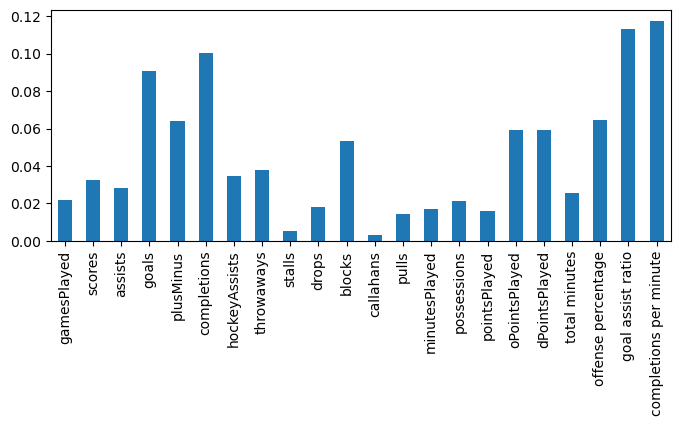

In [16]:
forest_importances = pd.Series(model.feature_importances_, index = X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax, figsize = (8,3))
fig.show()

In [18]:
importance_df = pd.DataFrame(forest_importances, columns = ['importance']).reset_index()
importance_df.rename(columns={'index':'feature'}, inplace=True)
importance_df.sort_values('importance', ascending=False, inplace=True)
top_8_features = list(importance_df['feature'].head(8))
pos_df = df.groupby('predicted_position')[top_8_features].mean()


scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(pos_df), columns=pos_df.columns, index=pos_df.index)

# Scale the values between 0 and 5 using MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(1, 5))
df_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_standardized), columns=df_standardized.columns, index=df_standardized.index)

df_scaled

df_transposed = df_scaled.T

# Create separate dataframes for each row
cutter_df = df_transposed['Cutter'].reset_index()
defender_df = df_transposed['Defender'].reset_index()
handler_df = df_transposed['Handler'].reset_index()

# Rename the columns
cutter_df.columns = ['Attribute', 'Cutter']
defender_df.columns = ['Attribute', 'Defender']
handler_df.columns = ['Attribute', 'Handler']




# Create subplots for each position
fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'polar'},{'type': 'polar'},{'type': 'polar'}]], 
                    subplot_titles=['Cutter', 'Defender', 'Handler'], horizontal_spacing=0.2)

fig.add_trace(
    go.Scatterpolar(r=cutter_df['Cutter'], theta=cutter_df['Attribute'], fill='toself', name='Cutter'),
    row=1, col=1
)

fig.add_trace(
    go.Scatterpolar(r=defender_df['Defender'], theta=defender_df['Attribute'], fill='toself', name='Defender'),
    row=1, col=2
)

fig.add_trace(
    go.Scatterpolar(r=handler_df['Handler'], theta=handler_df['Attribute'], fill='toself', name='Handler'),
    row=1, col=3
)

# Update layout
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, tickfont=dict(size=10)),
        angularaxis=dict(tickfont=dict(size=10), rotation = 22.5)),
    polar2=dict(radialaxis=dict(visible=True, tickfont=dict(size=10)),
        angularaxis=dict(tickfont=dict(size=10), rotation = 22.5)),
    polar3=dict(radialaxis=dict(visible=True, tickfont=dict(size=10)),
        angularaxis=dict(tickfont=dict(size=10), rotation = 22.5)),
    showlegend=False,
    margin=dict(l=100, r =100, t = 50),
    # Customize subplot titles font size
    title_font=dict(size=18, family='Arial', color='black'),
    title=dict(text='<b>Radial Charts of Position Characteristics<b>', font=dict(size=36, family='Arial', color='black'), x=0.5)
)

# Show the plot
fig.show()